***
***
***

# Data Analysis and Code | Regression-Based Analysis
**Machine Learning**<br />
Shresth Sethi - Student MSBA<br />
FMSBA5 - Valencia<br />
Hult International Business School<br><br>

***
***
***

***
***

**PROJECT APPRENTICE CHEF**<br /><br />
**AIM**: Of this project is to build a machine learning model to predict revenue over the first year of each
customer’s life cycle.<br />

**WHY**: Client want to better understand how much revenue to expect from each customer within their first year of
orders. <br />

**BACKGROUND**: Apprentice Chef have come to realize that over 90% of their revenue comes from customers that have been ordering meal sets for 12 months or less.<br />

**ASSUMPTION**: The dataset provided by the engineering team has used dataset engineering techniques and are statistically sound and represent the true picture of Apprentice Chef’s customers.<br />

***
***

**Importing Libraries**

In [1]:
#Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.linear_model
from ipywidgets import interactive
from IPython.display import display, HTML
import statsmodels.formula.api as smf

**Loading dataset to the environment**

In [2]:
#Loading data to the python file
original_df = pd.read_excel("Apprentice_Chef_Dataset.xlsx")
original_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

#Setting print operations for df
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**Interactive display of top rows of the dataset**

In [3]:
# Setting up top 20 rows for display on a slider
def inter(row):
    display(original_df.head(row))
    return row

interactive(inter, row = (1, 20, 1))

interactive(children=(IntSlider(value=10, description='row', max=20, min=1), Output()), _dom_classes=('widget-…

**NUMERICAL COLUMNS**<br />

Checking the statistics behind the columns

In [4]:
# Describing the variables
original_df.iloc[ :, 1: ].describe().round(2)

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


**CHECKING MISSING VALUES**<br /> 
If any in the dataset<br /><br />

***

Found that the dataset is almost clean only the **FAMILY_NAME** column has some missing values.

***

In [5]:
#Checking missing values and then summing it up to know the total column wise
d  = original_df.isnull().sum()

Further checking into the data, I found out that every missing value in Family_Name has an email id attached to it. The email starts with first name then there is a dot "." and then brackets"()" with value inside the brackets and then "@" followed by email domain.

Looking at this I have decided to fill the missing Family_Name with the values inside the "()".

**Performing the split in two steps**<br />
***
*NOTE: This will split the emails that have only the value for ")@" that means email that do not have ")@" together will not get there domain name correct For now the purpose is to remove the ")" to utilize it in further split and filling blank values *<br />*
***
STEP 1 : Split the email id by ")@"

In [6]:
#Creating an empty list
empty_lst = []


#loop to itterate over rows
for index, col in original_df.iterrows():    
    
    split_email = original_df.loc[index, 'EMAIL'].split(sep = ')@')#split with ')@'
    
    empty_lst.append(split_email)#appending the list
    


email_df = pd.DataFrame(empty_lst) #creating dataframe of empty list



email_df.columns = ['id', 'email_domain'] #assigning columns

STEP 2 : Split by ".(" to separate first and last name<br /><br />

***
*NOTE : This split is performed on the email_df created on the previous chunk not on original_df*
***

In [7]:
#Creating an empty list
empty_lst = []


#loop to itterate over rows of email_df
for index, col in email_df.iterrows():
    
    split_id = email_df.loc[index, 'id'].split(sep = '.(') #split with '.('
    
    empty_lst.append(split_id) #appending the list
    

    
id_df = pd.DataFrame(empty_lst) #creating dataframe of empty list



id_df.columns = ['m_first', 'm_last'] #assigning columns

**Filling the NA values**<br /><br />
From the id_df dataframe created above using only the last names to fill the last names in original_df

In [8]:
# Creating fill with values of last name
fill = id_df['m_last']

#Substituting the values in the original_df
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)

# Checking on missing values
original_df.isnull().any().sum()

0

***
***

## **Exploratory Data Analysis**

***
***

### Handling Categorical Data

Separating emails into different domains professional/ personal, and junk

STEP 1 : Separating the ID and Domain in different columns and storing it in email_df

In [9]:
#Creating an empty list
empty_lst = []



# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending the list
    empty_lst.append(split_email)
    


# converting empty_lst into a DataFrame 
email_df = pd.DataFrame(empty_lst)



# Creating the id and domain column in email_df
email_df.columns = ['ID', 'DOMAIN']

STEP 2 : Joining the data of email_df with original_df<br />
    
*NOTE : I will only be using domain to categorize so the join will be with only the DOMAIN column of email_df*

In [10]:
original_df = pd.concat([original_df, 
                   email_df.loc[:,'DOMAIN']], 
                   axis = 1)

STEP 3 : Creating customer email domain groups

*Professional/Personal/Junk*

In [11]:
professional = ['@mmm.com', '@amex.com', '@apple.com','@boeing.com',
                '@caterpillar.com', '@chevron.com', '@cisco.com',
                '@cocacola.com','@disney.com', '@dupont.com',
                '@exxon.com', '@ge.org','@goldmansacs.com', 
                '@homedepot.com', '@ibm.com', '@intel.com',
                '@jnj.com', '@jpmorgan.com', '@mcdonalds.com',
                '@merck.com', '@microsoft.com', '@nike.com', 
                '@pfizer.com', '@pg.com', '@travelers.com',
                '@unitedtech.com', '@unitedhealth.com', 
                '@verizon.com', '@visa.com', '@walmart.com']



personal     = ['@gmail.com', '@yahoo.com', '@protonmail.com']



junk         = ['@me.com', '@aol.com', '@hotmail.com', '@live.com',
                '@msn.com', '@passport.com']

STEP 4 : Assigning the groups created for email domains

Storing the values by creating a new column 'DOMAIN_GRP' in the df for further analysis

In [12]:
# Creating an empty list
empty_lst = []



# looping to assign domains
for i in original_df['DOMAIN']:
    
        if   '@'+ i in professional:
             empty_lst.append('professional') #professional emails
            
        elif '@' + i in personal:
             empty_lst.append('personal') # personal emails

        elif '@' + i in junk:
             empty_lst.append('junk') # junk emails
            
        else:
             print('Unknown')

                

# Creating a new column in the original dataset to store the assigned values
original_df['DOMAIN_GRP'] = pd.DataFrame(empty_lst)

STEP 5 : Creating one hot encoding variables

Dropping the "DOMAIN_GRP" column as it has already been encoded

In [13]:
#using get_dummies to encode the DOMAIN_GRP column
domain_one_hot = pd.get_dummies(original_df['DOMAIN_GRP'])



#Dropping the column
original_df          = original_df.drop('DOMAIN_GRP', axis = 1)



#Joining the one hot encoding with the df
original_df          = original_df.join([domain_one_hot])

### Handling Outliers

**Checking the Graphical Distributions**

Identifying outliers based on these distribution graphs

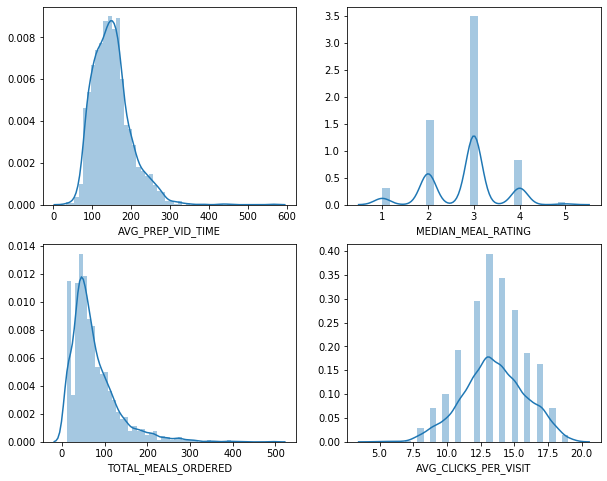

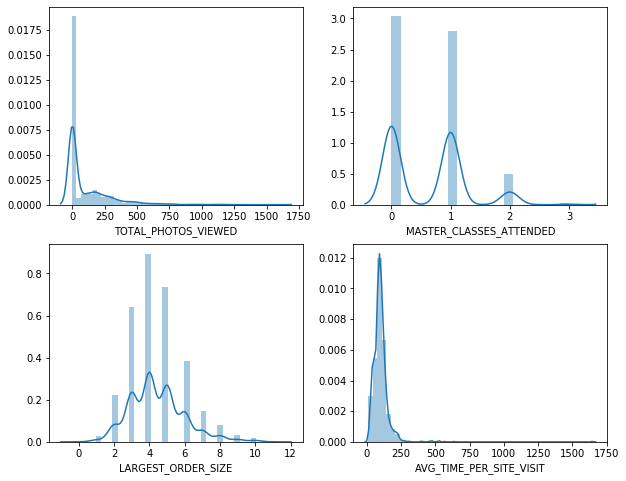

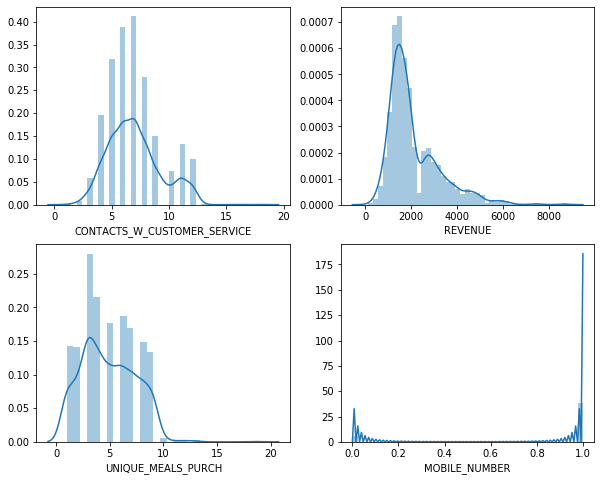

In [14]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_PREP_VID_TIME'])
plt.subplot(2, 2, 2)
sns.distplot(original_df['MEDIAN_MEAL_RATING'])
plt.subplot(2, 2, 3)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'])
plt.subplot(2, 2, 4)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'])
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'])
plt.subplot(2, 2, 2)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'])
plt.subplot(2, 2, 3)
sns.distplot(original_df['LARGEST_ORDER_SIZE'])
plt.subplot(2, 2, 4)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'])
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'])
plt.subplot(2,2,2)
sns.distplot(original_df['REVENUE'])
plt.subplot(2,2,3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'])
plt.subplot(2,2,4)
sns.distplot(original_df['MOBILE_NUMBER'])

plt.show()

***
***

## Feature Treatment and Engineering

***
***

### **Setting Thresholds**<br />

Based on the identified outliers assigned threshold values to these columns

In [15]:
#Setting threshold values
AVG_PREP_VID_TIME_hi             = 180
TOTAL_MEALS_ORDERED_hi           = 100
TOTAL_MEALS_ORDERED_lo           = 10       
MEDIAN_MEAL_RATING_at1           = 4
MEDIAN_MEAL_RATING_at1           = 4
AVG_CLICKS_PER_VISIT_hi          = 19
AVG_CLICKS_PER_VISIT_lo          = 8
TOTAL_PHOTOS_VIEWED_at           = 0
MASTER_CLASSES_ATTENDED_lo       = 0
MASTER_CLASSES_ATTENDED_hi       = 1
LARGEST_ORDER_SIZE_hi            = 10
LARGEST_ORDER_SIZE_lo            = 1
AVG_TIME_PER_SITE_VISIT_hi       = 200
CONTACTS_W_CUSTOMER_SERVICE_hi   = 9
CONTACTS_W_CUSTOMER_SERVICE_lo   = 3
UNIQUE_MEALS_PURCH_hi            = 8
MOBILE_NUMBER_at                 = 1

### **Creating new outliers variable**

Based on the threshold I have created following outliers variables for final model

In [16]:
# Selecting Median Meal Rating outliers
original_df['MEDIAN_MEAL_RATING_out_1'] = 0
condition_at_1 = original_df.loc[0:,'MEDIAN_MEAL_RATING_out_1'][original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_at1]
original_df['MEDIAN_MEAL_RATING_out_1'].replace(to_replace = condition_at_1,
                                                value      = 1,
                                                inplace    = True)



# Selecting Avg Clicks Per Visits outliers
original_df['AVG_CLICKS_PER_VISIT_out'] = 0
condition_hi = original_df.loc[0:,'AVG_CLICKS_PER_VISIT_out'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = original_df.loc[0:,'AVG_CLICKS_PER_VISIT_out'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['AVG_CLICKS_PER_VISIT_out'].replace(to_replace = condition_hi,
                                                value      = 1,
                                                inplace    = True)
original_df['AVG_CLICKS_PER_VISIT_out'].replace(to_replace = condition_lo,
                                                value      = 1,
                                                inplace    = True)



# Selecting Largest Order Size outliers
original_df['LARGEST_ORDER_SIZE_out'] = 0
condition_hi = original_df.loc[0:,'LARGEST_ORDER_SIZE_out'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
condition_lo = original_df.loc[0:,'LARGEST_ORDER_SIZE_out'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

original_df['LARGEST_ORDER_SIZE_out'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)
original_df['LARGEST_ORDER_SIZE_out'].replace(to_replace = condition_lo,
                                              value      = 1,
                                              inplace    = True)



# Selecting Avg Time Per Visits outliers
original_df['AVG_TIME_PER_SITE_VISIT_out'] = 0
condition_hi = original_df.loc[0:,'AVG_TIME_PER_SITE_VISIT_out'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]
original_df['AVG_TIME_PER_SITE_VISIT_out'].replace(to_replace = condition_hi,
                                                   value      = 1,
                                                   inplace    = True)



# Selecting Contacts With Customer Service outliers
original_df['CONTACTS_W_CUSTOMER_SERVICE_out'] = 0
condition_hi = original_df.loc[0:,'CONTACTS_W_CUSTOMER_SERVICE_out'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = original_df.loc[0:,'CONTACTS_W_CUSTOMER_SERVICE_out'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

original_df['CONTACTS_W_CUSTOMER_SERVICE_out'].replace(to_replace = condition_hi,
                                                       value      = 1,
                                                       inplace    = True)
original_df['CONTACTS_W_CUSTOMER_SERVICE_out'].replace(to_replace = condition_lo,
                                                       value      = 1,
                                                       inplace    = True)



# Selecting Unique Meals Purchased outliers
original_df['UNIQUE_MEALS_PURCH_out'] = 0
condition_hi = original_df.loc[0:,'UNIQUE_MEALS_PURCH_out'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
original_df['UNIQUE_MEALS_PURCH_out'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)



# Selecting Mobile Number at 1 people giving mobile number and excluding people with landline
original_df['MOBILE_NUMBER_at'] = 0
condition_at = original_df.loc[0:,'MOBILE_NUMBER_at'][original_df['MOBILE_NUMBER'] == MOBILE_NUMBER_at]
original_df['MOBILE_NUMBER_at'].replace(to_replace = condition_at,
                                        value      = 1,
                                        inplace    = True)


**CHECKPOINT 1**

Creating a check point to save the data

In [17]:
# saving results
original_df.to_excel('Apprentice_Chef_feature_rich.xlsx',
                index = False)

In [18]:
#Loading file
original_df = pd.read_excel('Apprentice_Chef_feature_rich.xlsx')

**Visualizing Pair Plots**

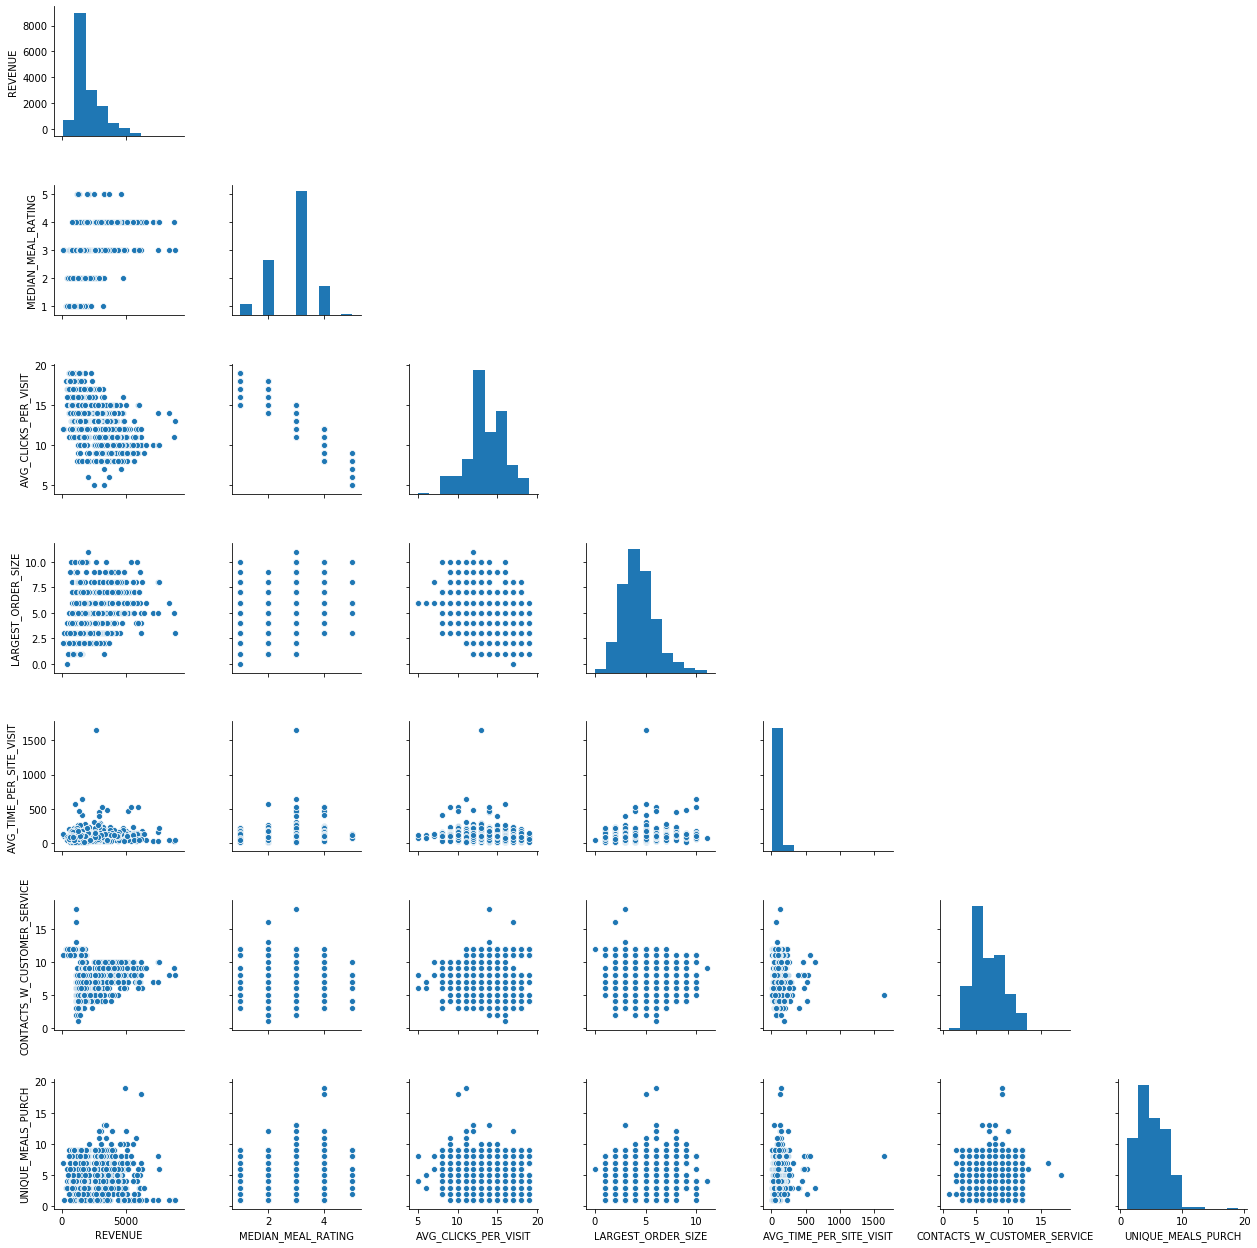

In [19]:
# Pair plots using seaborn
pl = sns.pairplot(original_df, vars = ['REVENUE',
                                       'MEDIAN_MEAL_RATING',
                                       'AVG_CLICKS_PER_VISIT',
                                       'LARGEST_ORDER_SIZE', 
                                       'AVG_TIME_PER_SITE_VISIT', 
                                       'CONTACTS_W_CUSTOMER_SERVICE', 
                                       'UNIQUE_MEALS_PURCH'],
                          
                                diag_kind = "auto",
                                kind      = 'scatter',
                  )


# Function to remove the upper triange
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

pl.map_upper(hide_current_axis) # removing upper triangle of the pair plots

plt.show() # display results

**Visualizing the relations with respect to revenue**

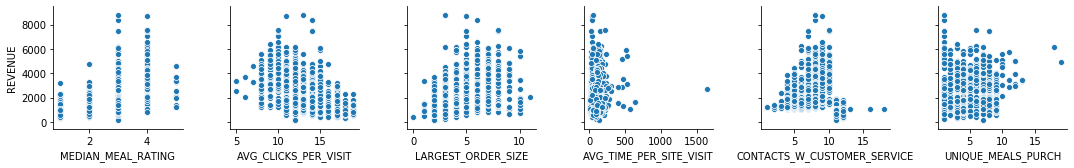

In [20]:
# Pair plots using seaborn
pl_rev = sns.pairplot(original_df, x_vars = [                            #Defining x variable
                                             'MEDIAN_MEAL_RATING', 
                                             'AVG_CLICKS_PER_VISIT',
                                             'LARGEST_ORDER_SIZE', 
                                             'AVG_TIME_PER_SITE_VISIT', 
                                             'CONTACTS_W_CUSTOMER_SERVICE', 
                                             'UNIQUE_MEALS_PURCH'
                                            ],                           
                                   y_vars = ['REVENUE'],                 #Defining y variable
                                   kind   =  'scatter',
                     )


plt.show()

### Creating New Calculated Fields

In [21]:
# Calculating fields with AVG_PREP_VID_TIME
original_df['avg_vid_time_meals_order']  = original_df['AVG_PREP_VID_TIME']*original_df['TOTAL_MEALS_ORDERED']
original_df['avg_vid_time_rating']       = original_df['AVG_PREP_VID_TIME']*original_df['MEDIAN_MEAL_RATING']
original_df['avg_vid_time_click']        = original_df['AVG_PREP_VID_TIME']/original_df['AVG_CLICKS_PER_VISIT']
original_df['avg_prep_total_photo']      = original_df['AVG_PREP_VID_TIME']*original_df['TOTAL_PHOTOS_VIEWED']
original_df['avg_vid_time_master_class'] = original_df['AVG_PREP_VID_TIME']*original_df['MASTER_CLASSES_ATTENDED']
original_df['avg_vid_time_larg_order']   = original_df['AVG_PREP_VID_TIME']*original_df['LARGEST_ORDER_SIZE']
original_df['avg_vid_customer_service']  = original_df['AVG_PREP_VID_TIME']*original_df['CONTACTS_W_CUSTOMER_SERVICE']



# Calculating fields with TOTAL_MEALS_ORDERED
original_df['meals_ordered_rating']      = original_df['TOTAL_MEALS_ORDERED']*original_df['MEDIAN_MEAL_RATING']
original_df['meals_ordered_click']       = original_df['TOTAL_MEALS_ORDERED']/original_df['AVG_CLICKS_PER_VISIT']
original_df['meals_ordered_photo']       = original_df['TOTAL_MEALS_ORDERED']*original_df['TOTAL_PHOTOS_VIEWED']
original_df['meals_ordered_site_visit']  = original_df['TOTAL_MEALS_ORDERED']*original_df['AVG_TIME_PER_SITE_VISIT']
original_df['Frequency_orders']          = 1/original_df['TOTAL_MEALS_ORDERED']



# Median rating given by a customer over the average clicks
original_df['rating_click_per_visit']    = original_df['MEDIAN_MEAL_RATING']/original_df['AVG_CLICKS_PER_VISIT']



# Taking log of the revenue
original_df['Ln_revenue']                = np.log(original_df['REVENUE'])


**CHECKPOINT 2**

In [22]:
#Saving features based datatset
original_df.to_excel('Apprentice_Chef_feature_rich.xlsx',
                     index = False)
#reading the features dataset
original_df = pd.read_excel('Apprentice_Chef_feature_rich.xlsx')

***
***

## Modeling Techniques

***
***

### **CORRELATION MATRIX**

The correlations show by how much a value is related with revenue. These displayed below are all highly correlated variables. This mean any change in them will have positive/negative result on the model depending on the variable sign.

***
**Positive high correlation** <br />
avg_vid_time_rating &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 0.74<br />
avg_vid_time_click &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;               0.69<br />
AVG_PREP_VID_TIME    &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;              0.65<br />
meals_ordered_rating     &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;          0.65<br />
MEDIAN_MEAL_RATING        &nbsp; &nbsp; &nbsp; &nbsp; 0.65<br />
avg_vid_time_meals_order  &nbsp;&nbsp;&nbsp;&nbsp;    0.64<br />
meals_ordered_click &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp;&nbsp;              0.63<br />
rating_click_per_visit     &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;       0.62<br />
TOTAL_MEALS_ORDERED       &nbsp; &nbsp;        0.61<br />
avg_vid_time_master_class  &nbsp; &nbsp;     0.54<br />
MEDIAN_MEAL_RATING_out_1   &nbsp; &nbsp; &nbsp; &nbsp;      0.53<br />
avg_vid_time_larg_order    &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;       0.53<br />
avg_vid_customer_service   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;        0.51<br />
meals_ordered_site_visit   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        0.51<br />
MASTER_CLASSES_ATTENDED    &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        0.47<br />
meals_ordered_photo       &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;         0.46<br />
LARGEST_ORDER_SIZE        &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;         0.45<br />
avg_prep_total_photo       &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        0.45<br />
TOTAL_PHOTOS_VIEWED        &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        0.43<br />
<br > **Few Negative but high correlation** <br />
CONTACTS_W_CUSTOMER_SERVICE_out &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  -0.33<br />
AVG_CLICKS_PER_VISIT          &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;    -0.58<br />
Frequency_orders             &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     -0.65<br />
***

In [23]:
#creating correlation for the dataset
df_corr = original_df.corr().round(2)


#displaying result of correlation with respect to revenue
df_corr.loc[ : ,'Ln_revenue'].sort_values(ascending = False)

Ln_revenue                         1.00
REVENUE                            0.95
avg_vid_time_rating                0.74
avg_vid_time_click                 0.69
AVG_PREP_VID_TIME                  0.65
meals_ordered_rating               0.65
MEDIAN_MEAL_RATING                 0.65
avg_vid_time_meals_order           0.64
meals_ordered_click                0.63
rating_click_per_visit             0.62
TOTAL_MEALS_ORDERED                0.61
avg_vid_time_master_class          0.54
MEDIAN_MEAL_RATING_out_1           0.53
avg_vid_time_larg_order            0.53
avg_vid_customer_service           0.51
meals_ordered_site_visit           0.51
MASTER_CLASSES_ATTENDED            0.47
meals_ordered_photo                0.46
LARGEST_ORDER_SIZE                 0.45
avg_prep_total_photo               0.45
TOTAL_PHOTOS_VIEWED                0.43
AVG_TIME_PER_SITE_VISIT            0.14
AVG_CLICKS_PER_VISIT_out           0.06
PRODUCT_CATEGORIES_VIEWED          0.04
MOBILE_NUMBER_at                   0.04


### OLS Regression

Creating X variable with statistically significant columns<br />
Printing the result with + sign to be used further in OLS regression <br />

***
*NOTE : I am using only the statistically significant columns to display my final model*
***


In [24]:
# Creating X variable for the model
x_val_log = ['avg_vid_time_rating',           
            'rating_click_per_visit',             
            'MEDIAN_MEAL_RATING_out_1',        
            'avg_vid_time_larg_order',           
            'avg_vid_customer_service',                   
            'MASTER_CLASSES_ATTENDED',            
            'meals_ordered_photo',          
            'avg_prep_total_photo',              
            'TOTAL_PHOTOS_VIEWED',                      
            'CONTACTS_W_CUSTOMER_SERVICE_out',   
            'AVG_CLICKS_PER_VISIT',
            'Frequency_orders',
            'UNIQUE_MEALS_PURCH',
            'PACKAGE_LOCKER',
            'UNIQUE_MEALS_PURCH_out',
            'LARGEST_ORDER_SIZE_out',
            'junk',
            'personal',
            'professional'
            ]
#Using the loop to print the values to be ussed in ols regression
for name in x_val_log:
    print(f"{name} +")

avg_vid_time_rating +
rating_click_per_visit +
MEDIAN_MEAL_RATING_out_1 +
avg_vid_time_larg_order +
avg_vid_customer_service +
MASTER_CLASSES_ATTENDED +
meals_ordered_photo +
avg_prep_total_photo +
TOTAL_PHOTOS_VIEWED +
CONTACTS_W_CUSTOMER_SERVICE_out +
AVG_CLICKS_PER_VISIT +
Frequency_orders +
UNIQUE_MEALS_PURCH +
PACKAGE_LOCKER +
UNIQUE_MEALS_PURCH_out +
LARGEST_ORDER_SIZE_out +
junk +
personal +
professional +


**DEVELOPING THE OLS MODEL**

The model here is used to check the R square of the variables.<br />
The Adjusted R Square is 0.74<br />
The P values are all statistically significant, lower than 0.05<br />
The y_variable for this model is "Ln_revenue" i.e the log of the revenue column and the x_variable is the statistically significant columns.

In [25]:
#Linear Regression Model OLS
lm_best = smf.ols(formula = """Ln_revenue ~ 
                               avg_vid_time_rating +
                               rating_click_per_visit +
                               MEDIAN_MEAL_RATING_out_1 +
                               avg_vid_time_larg_order +
                               avg_vid_customer_service +
                               MASTER_CLASSES_ATTENDED +
                               meals_ordered_photo +
                               avg_prep_total_photo +
                               TOTAL_PHOTOS_VIEWED +
                               CONTACTS_W_CUSTOMER_SERVICE_out +
                               AVG_CLICKS_PER_VISIT +
                               Frequency_orders +
                               UNIQUE_MEALS_PURCH +
                               PACKAGE_LOCKER +
                               UNIQUE_MEALS_PURCH_out +
                               LARGEST_ORDER_SIZE_out +
                               junk +
                               personal +
                               professional
                            """,
                  data = original_df)



# Fitting the ols model
results = lm_best.fit()



### Displaying the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Ln_revenue   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     310.7
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:42:10   Log-Likelihood:                -38.695
No. Observations:                1946   AIC:                             115.4
Df Residuals:                    1927   BIC:                             221.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

***
***

## Final Model

***
***

### Train/Test Split<br />

Creating the train test split with target variable as Revenue. Test size as 0.25 that creates a 75% and 25% split between train and test at a given random state of 222.

In [26]:
# train_test_split
# training data on the x variable that has statisticaly significant values except the tareget variable
chef_data = original_df.loc[: , x_val_log]



# target data on the y variable that has the target that we need to achieve
chef_target = original_df.loc[:, "Ln_revenue"]



# test_size = 0.25 and randome_state = 222
X_train, X_test, y_train, y_test = train_test_split(chef_data,
                                                    chef_target,
                                                    test_size = 0.25,
                                                    random_state = 222)
# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 19)
(1459,)
(487, 19)
(487,)


### Linear Regression Model

Using the sklearn linear model linear regression.<br>
Fitting the model on the train data set X_train and y_train<br>
Predicting the model on the test dataset X_test<br>
Measuring the model performance by checking the model training score and testing score<br>

Model training score is 0.752 i.e model predicted correct revenue 75% of the time on training dataset
Model testing score is 0.712 i.e model predicted correct revenue 71% of the time on testing dataset

In [27]:
# Instantiating the final model, I am using Linear Regression for my final approach
final_model = sklearn.linear_model.LinearRegression()



# Model fitting on the training data
final_fit= final_model.fit(X_train, y_train)



# Model prediction on test data
final_pred = final_model.predict(X_test)

# Scoring final model on the traing and testing set
# Printing the score for the model
print('Training Score:', final_model.score(X_train, y_train).round(3))
print('Testing Score:',  final_model.score(X_test, y_test).round(3))



# Saving the results in variable test_score
test_score = final_model.score(X_test, y_test)

Training Score: 0.752
Testing Score: 0.712
